In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [65]:
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
df = pd.read_csv("USArrests.csv")
df.index = df['Unnamed: 0']
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [67]:
df = df.iloc[:, 1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [68]:
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [69]:
# No dublicated values
df.duplicated().sum()

0

In [70]:
# No missing values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [73]:
df.index.value_counts()

Massachusetts     1
Washington        1
Michigan          1
Oklahoma          1
Idaho             1
Pennsylvania      1
Maine             1
Kansas            1
Mississippi       1
Tennessee         1
Georgia           1
Rhode Island      1
South Dakota      1
North Dakota      1
Nebraska          1
South Carolina    1
Colorado          1
Texas             1
New Hampshire     1
Maryland          1
Alabama           1
Missouri          1
New York          1
Florida           1
Hawaii            1
Louisiana         1
Minnesota         1
California        1
New Jersey        1
Nevada            1
Illinois          1
Kentucky          1
North Carolina    1
Arizona           1
Utah              1
Wisconsin         1
Indiana           1
Virginia          1
Iowa              1
Ohio              1
West Virginia     1
Oregon            1
Montana           1
Alaska            1
Arkansas          1
Connecticut       1
New Mexico        1
Wyoming           1
Vermont           1
Delaware          1


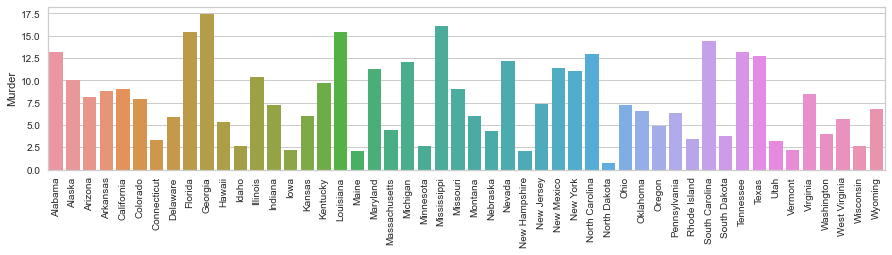

In [74]:
# Murders for each States
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['Murder'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

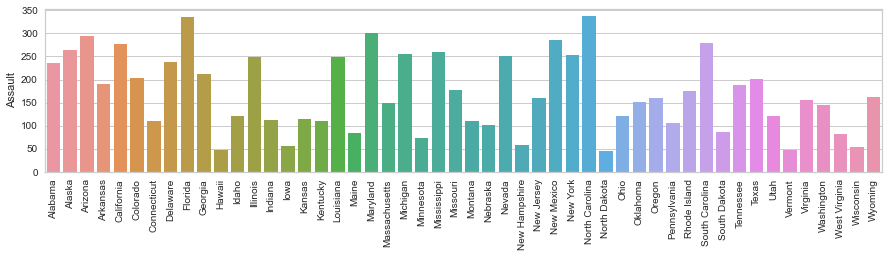

In [75]:
# Assaults for each States
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['Assault'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

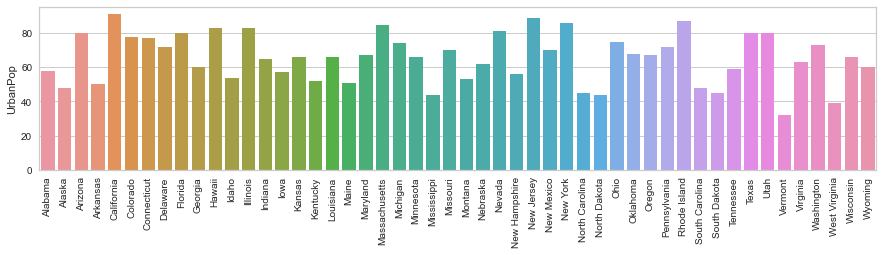

In [76]:
# Urban Populantions for each States
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['UrbanPop'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

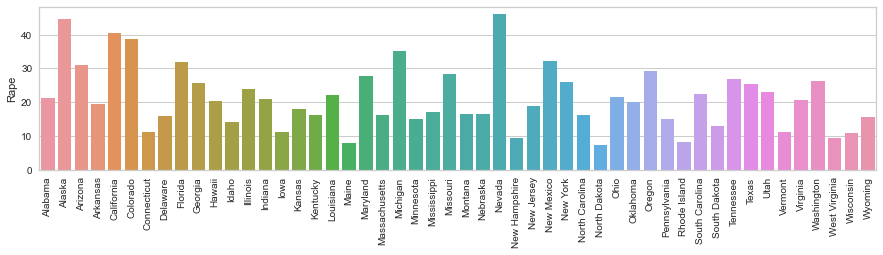

In [77]:
# Rapes for each States
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['Rape'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='Rape', ylabel='Density'>

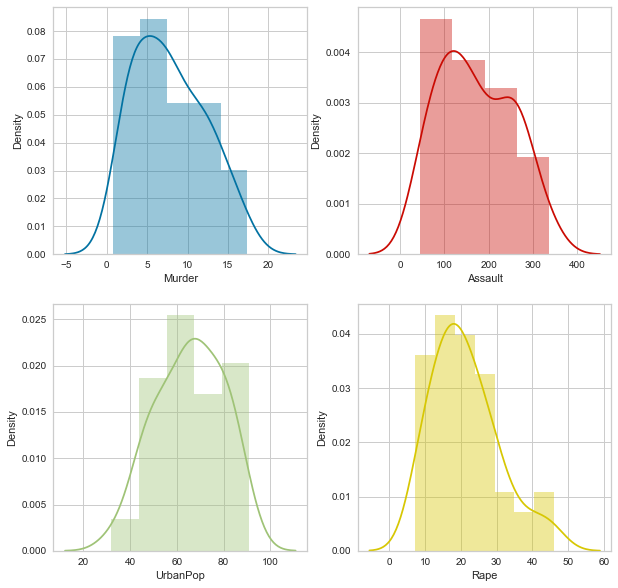

In [78]:
# Analyze distributions
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['Murder'], ax=axs[0,0])
sns.distplot(df['Assault'], color = 'r', ax=axs[0,1])
sns.distplot(df['UrbanPop'], color = 'g', ax=axs[1,0])
sns.distplot(df['Rape'], color = 'y', ax=axs[1,1])

In [79]:
# It seems that "Assault" and "Rape" dont distribut normally
# Lets apply Shapiro-Wilk test to confirm that 

In [80]:
# Shapiro Test
from scipy.stats import shapiro

In [81]:
# H0: Distribution is Normal
# H1: Distribution is not Normal

test_statistics, p_value = shapiro(df['Murder'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.9570268988609314
P-value:  0.06674208492040634


In [82]:
# p_value is not less than 0.05. So, we can say that distribution of "Murder" is normal  

In [83]:
# H0: Distribution is Normal
# H1: Distribution is not Normal

test_statistics, p_value = shapiro(df['Assault'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.951815128326416
P-value:  0.04052506387233734


In [84]:
# p_value is less than 0.05. So, we can say that distribution of "Assault" is not normal  

In [85]:
# H0: Distribution is Normal
# H1: Distribution is not Normal

test_statistics, p_value = shapiro(df['UrbanPop'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.9771350622177124
P-value:  0.43845951557159424


In [86]:
# p_value is not less than 0.05. So, we can say that distribution of "UrbanPop" is normal  

In [87]:
# H0: Distribution is Normal
# H1: Distribution is not Normal

test_statistics, p_value = shapiro(df['Rape'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.9467371106147766
P-value:  0.025097200646996498


In [88]:
# p_value is less than 0.05. So, we can say that distribution of "Rape" is not normal  

<AxesSubplot:xlabel='Rape'>

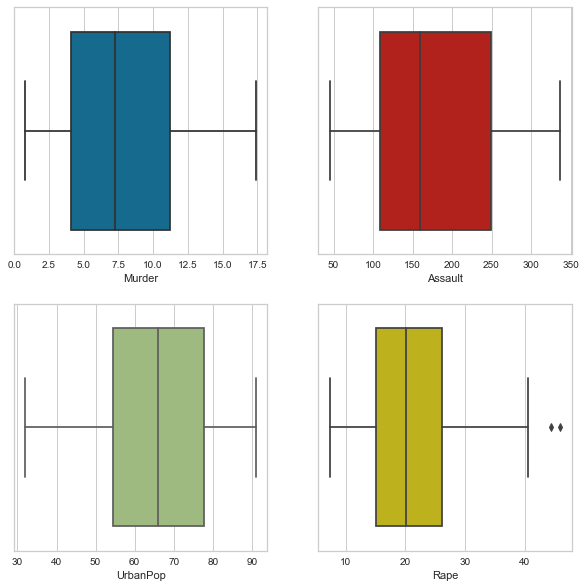

In [89]:
# Boxplot
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.boxplot(df['Murder'], ax=axs[0,0])
sns.boxplot(df['Assault'], color = 'r', ax=axs[0,1])
sns.boxplot(df['UrbanPop'], color = 'g', ax=axs[1,0])
sns.boxplot(df['Rape'], color = 'y', ax=axs[1,1])

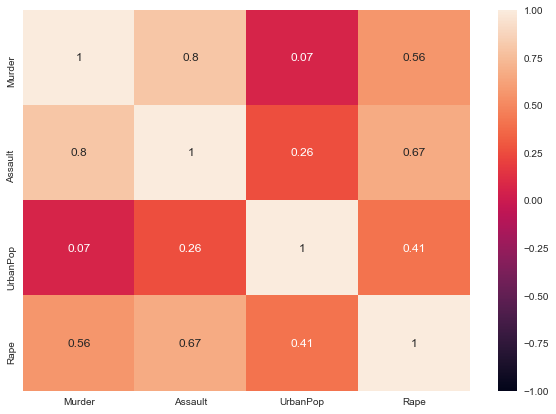

In [90]:
# Correlations between features
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1);

In [91]:
# Generally, we expect the correlations between the features to be high since the subject is crimes.
# In addition, we can see from this table that there is a strong positive correlation between "Assault" and "Murder"

### KMeans

### Find Optimum number of Clusters (Elbow) 

In [ ]:
# We need to find optimum number of clusters (minimum similarities between several clusters and maximum similarities interclusters)

In [92]:
#!pip install yellowbrick

In [93]:
from yellowbrick.cluster import KElbowVisualizer

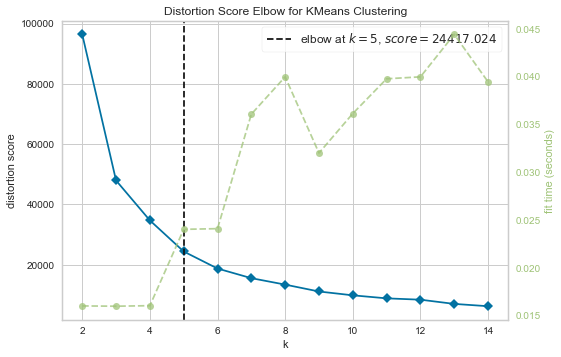

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,15))
visualizer.fit(df)
visualizer.poof()

### Final Model

In [95]:
kmeans = KMeans(n_clusters = 5).fit(df)
print("Number of clusters: ", kmeans.n_clusters)
print("-"*70)
print("Cluster Centers: ", '\n', kmeans.cluster_centers_)

Number of clusters:  5
----------------------------------------------------------------------
Cluster Centers:  
 [[  5.59       112.4         65.6         17.27      ]
 [ 11.76666667 257.91666667  68.41666667  28.93333333]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [ 11.95       316.5         68.          26.7       ]
 [  2.95        62.7         53.9         11.51      ]]


In [96]:
labels = kmeans.labels_
labels

array([1, 1, 3, 2, 1, 2, 0, 1, 3, 2, 4, 0, 1, 0, 4, 0, 0, 1, 4, 3, 2, 1,
       4, 1, 2, 0, 0, 1, 4, 2, 1, 1, 3, 4, 0, 2, 2, 0, 2, 1, 4, 2, 2, 0,
       4, 2, 2, 4, 4, 2])

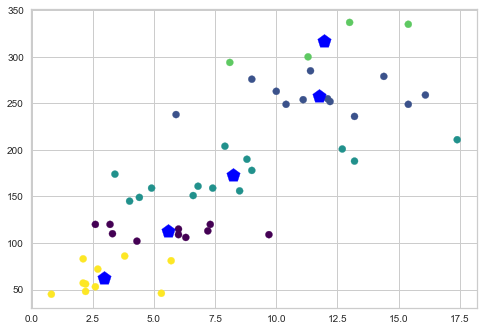

In [97]:
# Visualization
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'Blue', s = 200, marker = 'p')

In [98]:
# !pip install --upgrade matplotlib
# import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

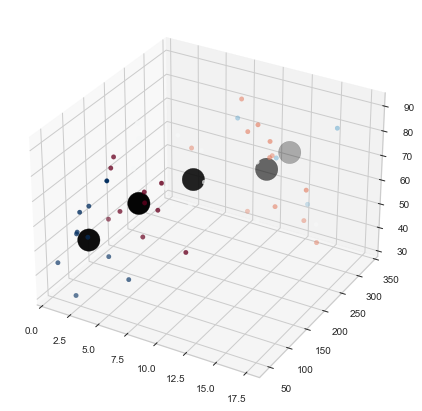

In [102]:
# 3D visualization
fig = plt.figure()
ax = Axes3D(fig)
x = df.iloc[:,0]
y = df.iloc[:,1]
z = df.iloc[:,2]
ax.scatter(x, y, z, c = labels,  cmap = 'RdBu')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c ="#050505", marker="o", s = 500);

In [103]:
# Showing States and Clusters that States belong to, together 
clustered_df = pd.DataFrame({'States': df.index,
                             'Clusters': labels})
clustered_df.head()

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,3
3,Arkansas,2
4,California,1


In [104]:
# Showing Clusters respectively
clustered_df.sort_values(by = 'Clusters')

,States,Clusters
26,Nebraska,0
25,Montana,0
43,Utah,0
6,Connecticut,0
34,Ohio,0
37,Pennsylvania,0
11,Idaho,0
16,Kentucky,0
13,Indiana,0
15,Kansas,0
